In [1]:
from plantcv import plantcv as pcv
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import skimage.morphology as morph
import skimage
import skimage.io

In [2]:
#edges2, np.max(edges2)

In [3]:
img = Image.open('DataSet/train/LEAF_0225.jpg').convert('RGBA')
arr = np.array(img)

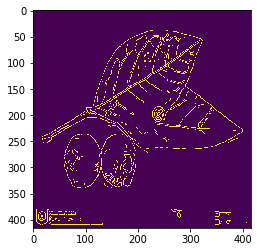

In [4]:
pcv.params.debug = "print"
img = plt.imread('DataSet/train/LEAF_0489.jpg')
img
edges = pcv.canny_edge_detect(img)
edges2 = pcv.canny_edge_detect(img=img, high_thresh=60, low_thresh =40, sigma=1)
plt.imshow(edges2, interpolation='nearest')
plt.show()

In [5]:
radius = 2
selem = morph.disk(radius)

img = skimage.io.imread('5_canny_edge_detect.png', as_gray=True)
cierre = morph.binary_closing(img,selem)

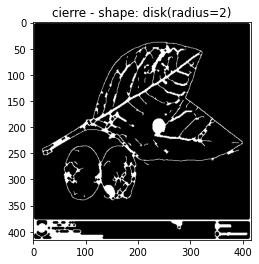

In [6]:
#Crear subplot 1x2 que muestre imagen original e imagen bajo cierre
fig, ax2 = plt.subplots()
ax2.set_title('cierre - shape: disk(radius='+str(radius)+')')
#ax2.savefig('prueba.png')
ax2.imshow(cierre, cmap='gray')
plt.savefig('prueba.png')

In [7]:
# open source image file
image = cv2.imread('prueba.png', cv2.IMREAD_UNCHANGED)

# convert image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# onvert image to blck and white
thresh, image_edges = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)

# create canvas
canvas = np.zeros(image.shape, np.uint8)
canvas.fill(255)

# create background mask
mask = np.zeros(image.shape, np.uint8)
mask.fill(255)

# create new background
new_background = np.zeros(image.shape, np.uint8)
new_background.fill(255)

# get all contours
contours_draw, hierachy = cv2.findContours(image_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# get most significant contours
contours_mask, hierachy = cv2.findContours(image_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# draw all contours
#cv2.drawContours(canvas, contours_draw, 1, (0, 0, 0), 3)

# contours traversal
for contour in range(len(contours_draw)):
    # draw current contour
    cv2.drawContours(canvas, contours_draw, contour, (0, 0, 0), 3)

# most significant contours traversal
for contour in range(len(contours_mask)):
    # create mask
    if contour != 1:
        cv2.fillConvexPoly(mask, contours_mask[contour], (0, 0, 0))

    # create background
    if contour != 1:
        cv2.fillConvexPoly(new_background, contours_mask[contour], (0, 255, 0))

# display the image in a window
cv2.imshow('Original', image)
cv2.imshow('Contours', canvas)
cv2.imshow('Background mask', mask)
cv2.imshow('New background', new_background)
cv2.imshow('Output', cv2.bitwise_and(image, new_background))

# write images
cv2.imwrite('contours.png', canvas)
cv2.imwrite('mask.png', mask)
cv2.imwrite('background.png', new_background)
cv2.imwrite('output.png', cv2.bitwise_and(image, new_background))

# escape condition
cv2.waitKey(0)

# clean up windows
cv2.destroyAllWindows()